## Importing Libraries

In [2]:
!pip install -U scikit-activeml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iteration-utilities: filename=iteration_utilities-0.11.0-cp310-cp310-linux_x86_64.whl size=327914 sha256=cef1c034ffcf4dc9ccbcd3d42693d18d437af264e7aab7dd075f57c9a840dd62
  Stored in directory: /root/.cache/pip/wheels/2d/ab/c4/309aa5942beba1f36d6744acf619b7a314fca50f6a7ccce68c
Successfully built iteration-utilities
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: joblib
    Found existing installation

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from skactiveml.classifier import SklearnClassifier
from skactiveml.pool import UncertaintySampling
from skactiveml.pool import RandomSampling
from skactiveml.utils import MISSING_LABEL

## Dry Bean Dataset

In [22]:
bean_data = pd.read_excel("Dry_Bean_Dataset.xlsx")
bean_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [23]:
bean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [24]:
fruit_data = pd.read_excel("Date_Fruit_Datasets.xlsx")
fruit_data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [25]:
fruit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [26]:
def data_preprocessing(df):

    X = df.drop(['Class'], axis = 1)
    y = df['Class']

    lbl = LabelEncoder()
    y = lbl.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the testing data
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [27]:
datasets = {'Bean Data':bean_data,
           'Fruit Data':fruit_data}


### Passive Learning

In [28]:
model = RandomForestClassifier(random_state=42)

for name,data in datasets.items():
    X_train, X_test, y_train, y_test = data_preprocessing(data)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(name)
    print("----------")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------------------")

Bean Data
----------
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       261
           1       1.00      1.00      1.00       117
           2       0.92      0.94      0.93       317
           3       0.90      0.92      0.91       671
           4       0.97      0.96      0.96       408
           5       0.97      0.94      0.95       413
           6       0.88      0.88      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.93      0.93      2723

---------------------------------------------------------
Fruit Data
----------
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.68      0.85      0.76        20
           2       1.00      0.90      0.95        50
           3       0.75      0.90      0.82        10
           4       1.00      0.

### Active Learning

In [29]:
# Active Learning strategies
entropy = UncertaintySampling(method='entropy', random_state=1234)
margin = UncertaintySampling(method='margin_sampling', random_state=1234)
least = UncertaintySampling(method='least_confident', random_state=1234)
random = RandomSampling(random_state=1234)

In [30]:
num_rounds = 10
batch = 10
results = {'Bean Data':
           {'Random Sampling': {'Training Accuracies': [], 'Testing Accuracies': []},
           'Least Confident': {'Training Accuracies': [], 'Testing Accuracies': []},
           'Margin Sampling': {'Training Accuracies': [], 'Testing Accuracies': []},
           'Entropy Sampling': {'Training Accuracies': [], 'Testing Accuracies': []}
            }
           ,'Fruit Data':
           {'Random Sampling': {'Training Accuracies': [], 'Testing Accuracies': []},
           'Least Confident': {'Training Accuracies': [], 'Testing Accuracies': []},
           'Margin Sampling': {'Training Accuracies': [], 'Testing Accuracies': []},
           'Entropy Sampling': {'Training Accuracies': [], 'Testing Accuracies': []}
            }
          }

In [31]:
for name, data in datasets.items():
    print(name)
    print("----------")

    X_train, X_test, y_train, y_test = data_preprocessing(data)
    clf = SklearnClassifier(RandomForestClassifier(random_state=1234), classes=np.unique(y_train), random_state=1234)
    y_unlabeled = np.full(shape=y_train.shape, fill_value=MISSING_LABEL)

    for round in range(num_rounds):
        print(f"\nRound {round + 1}:")
        print("--------------")

        for strategy in results[name].keys():
            if strategy == 'Random Sampling':
                query_idx = random.query(X=X_train, y=y_unlabeled, batch_size=batch)
            elif strategy == 'Least Confident':
                query_idx = least.query(X=X_train, y=y_unlabeled, clf=clf, batch_size=batch)
            elif strategy == 'Margin Sampling':
                query_idx = margin.query(X=X_train, y=y_unlabeled, clf=clf, batch_size=batch)
            elif strategy == 'Entropy Sampling':
                query_idx = entropy.query(X=X_train, y=y_unlabeled, clf=clf, batch_size=batch)

            y_unlabeled[query_idx] = y_train[query_idx]
            clf.fit(X_train, y_unlabeled)

            # Calculate training accuracy
            train_acc = accuracy_score(y_train, clf.predict(X_train))
            results[name][strategy]['Training Accuracies'].append(train_acc)

            # Calculate testing accuracy
            test_acc = accuracy_score(y_test, clf.predict(X_test))
            results[name][strategy]['Testing Accuracies'].append(test_acc)

            print(f"{strategy} - Training Accuracy: {train_acc*100:.2f}%, Testing Accuracy: {test_acc*100:.2f}%")
            print("===================================================================================")

Bean Data
----------

Round 1:
--------------
Random Sampling - Training Accuracy: 61.03%, Testing Accuracy: 61.00%
Least Confident - Training Accuracy: 67.87%, Testing Accuracy: 68.31%
Margin Sampling - Training Accuracy: 75.62%, Testing Accuracy: 76.83%
Entropy Sampling - Training Accuracy: 82.21%, Testing Accuracy: 82.85%

Round 2:
--------------
Random Sampling - Training Accuracy: 82.88%, Testing Accuracy: 84.17%
Least Confident - Training Accuracy: 84.90%, Testing Accuracy: 86.27%
Margin Sampling - Training Accuracy: 85.78%, Testing Accuracy: 85.82%
Entropy Sampling - Training Accuracy: 83.16%, Testing Accuracy: 83.11%

Round 3:
--------------
Random Sampling - Training Accuracy: 86.68%, Testing Accuracy: 86.71%
Least Confident - Training Accuracy: 86.99%, Testing Accuracy: 86.63%
Margin Sampling - Training Accuracy: 89.43%, Testing Accuracy: 88.58%
Entropy Sampling - Training Accuracy: 88.68%, Testing Accuracy: 88.03%

Round 4:
--------------
Random Sampling - Training Accuracy:

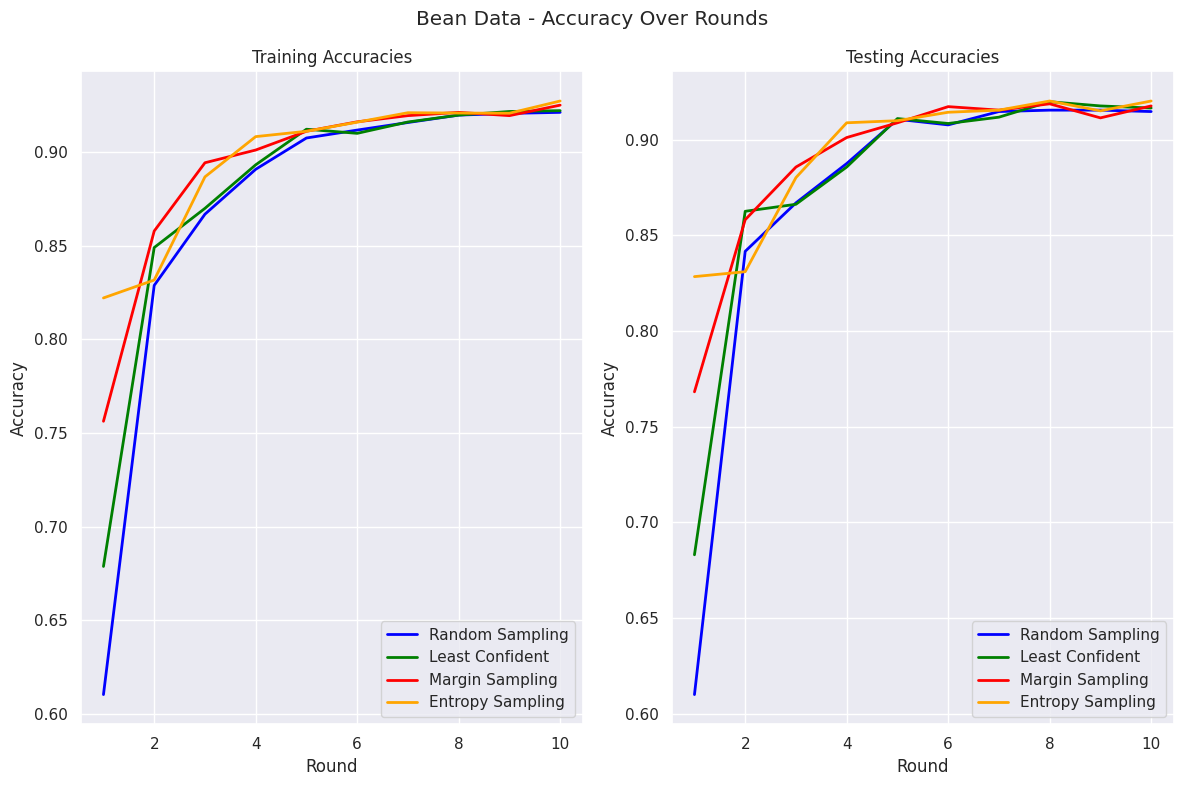

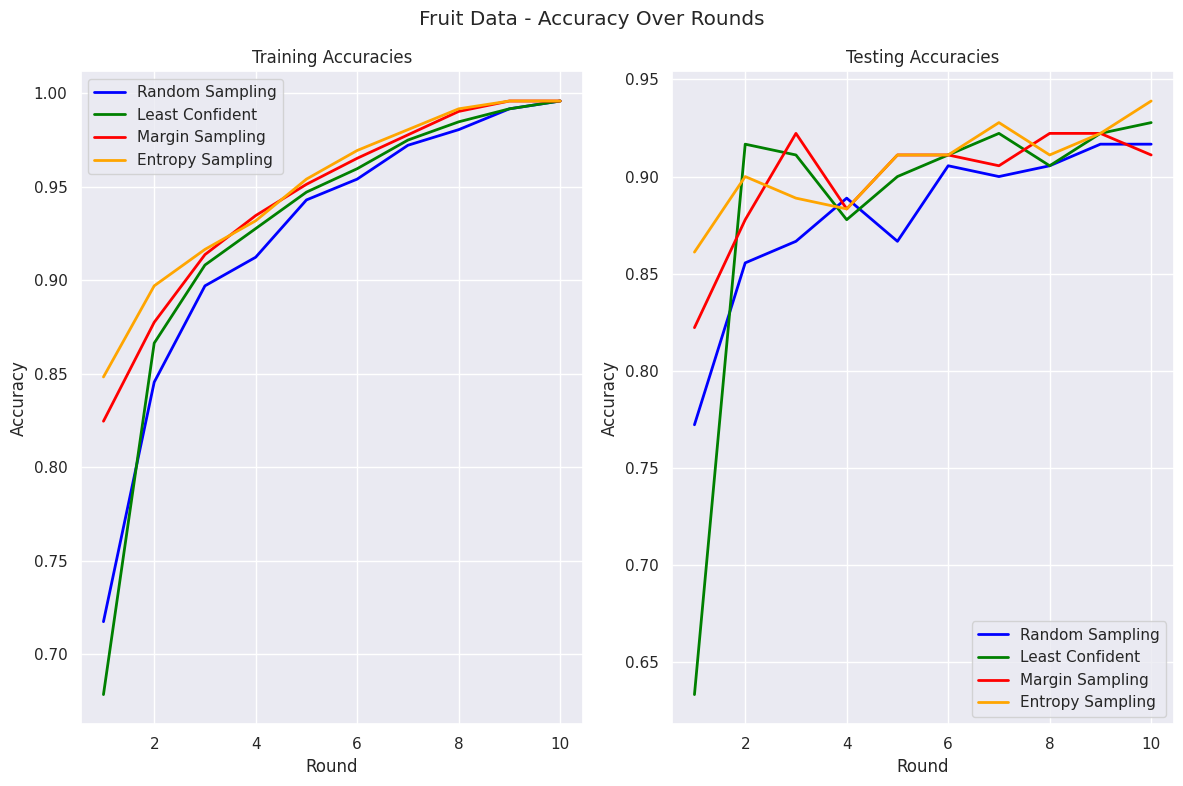

In [32]:
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="darkgrid")

# Define line colors
colors = ['blue', 'green', 'red', 'orange']

# Iterate over each dataset
for name in results.keys():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
    fig.suptitle(name + ' - Accuracy Over Rounds')
    strategies = results[name].keys()

    for i, strategy in enumerate(strategies):
        # Plot training accuracies
        axes[0].plot(range(1, num_rounds + 1), results[name][strategy]['Training Accuracies'],
                     label=strategy, color=colors[i], linewidth=2)
        axes[0].set_title('Training Accuracies')
        axes[0].set_xlabel('Round')
        axes[0].set_ylabel('Accuracy')
        axes[0].legend()

        # Plot testing accuracies
        axes[1].plot(range(1, num_rounds + 1), results[name][strategy]['Testing Accuracies'],
                     label=strategy, color=colors[i], linewidth=2)
        axes[1].set_title('Testing Accuracies')
        axes[1].set_xlabel('Round')
        axes[1].set_ylabel('Accuracy')
        axes[1].legend()

    plt.tight_layout()
    plt.show()


## Imbalanced Dataset

In [33]:
wine = pd.read_csv("WineQT.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [34]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [35]:
wine.drop (['Id']  , axis = 1,inplace=True)
wine.rename(columns={'quality':'Class'}, inplace=True)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


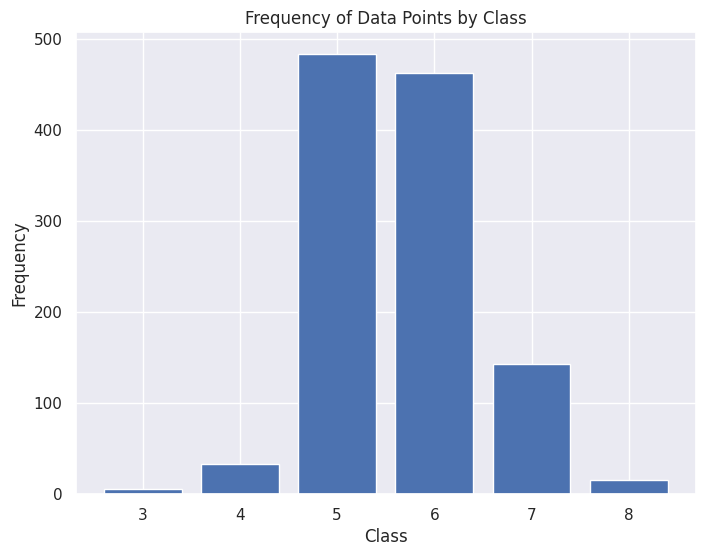

In [36]:
class_frequency = wine.groupby('Class').size().reset_index(name='frequency')

# Plot the frequency
plt.figure(figsize=(8, 6))
plt.bar(class_frequency['Class'], class_frequency['frequency'])
plt.title('Frequency of Data Points by Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [37]:
X_train, X_test, y_train, y_test = data_preprocessing(wine)

### Passive Learning

In [38]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

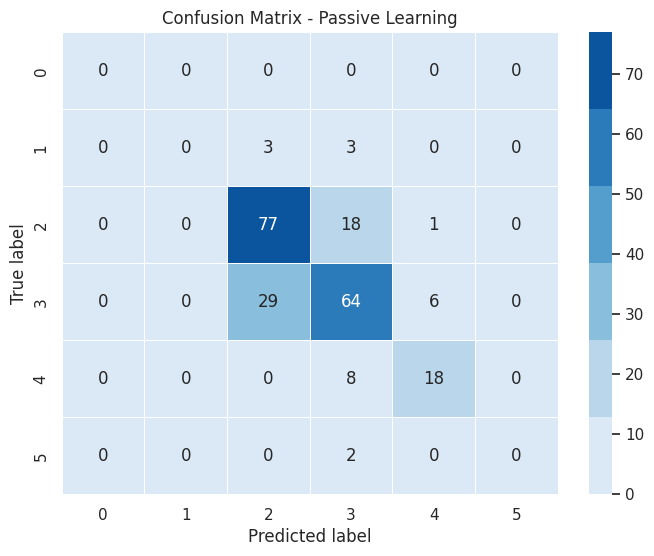

In [39]:
cm = confusion_matrix(y_test,y_pred,labels=list(np.arange(0,6)))
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True,ax=ax,fmt="d",linewidths=.5,cmap=sns.color_palette("Blues"));
plt.title(f'Confusion Matrix - Passive Learning')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Active Learning

In [40]:
clf = SklearnClassifier(RandomForestClassifier(random_state=1234), classes=np.unique(y_train), random_state = 1234)
y_unlabeled = np.full(shape=y_train.shape, fill_value=MISSING_LABEL)


Round 1:
-----------------


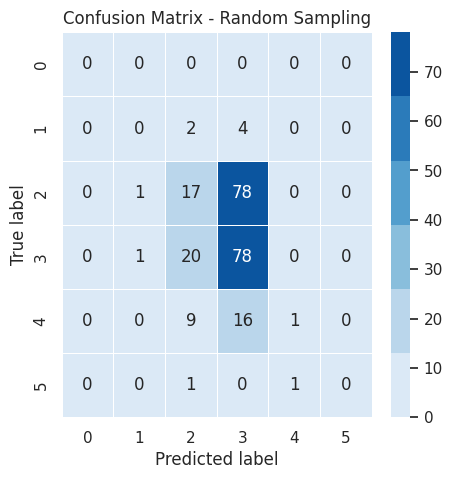

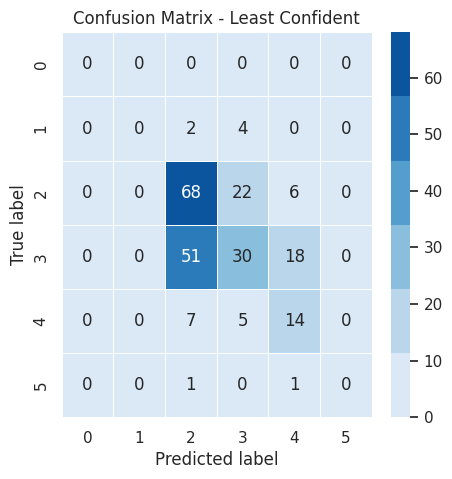

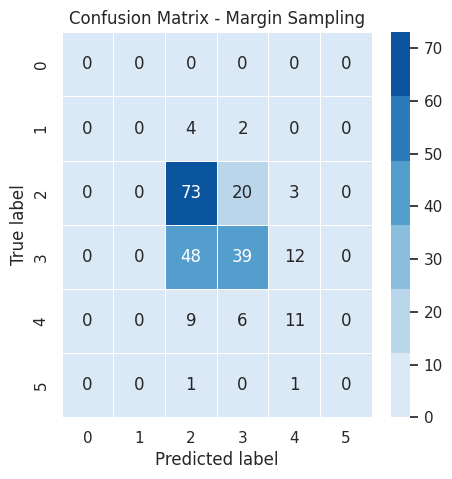

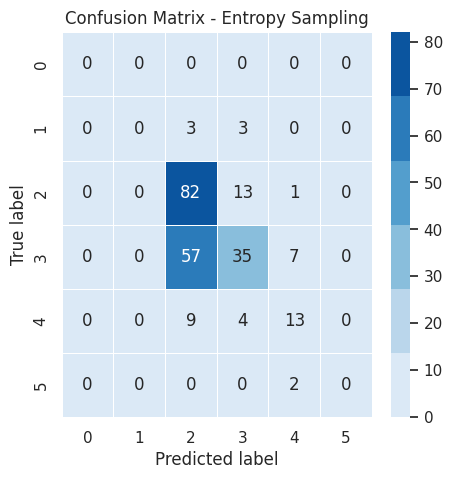



Round 2:
-----------------


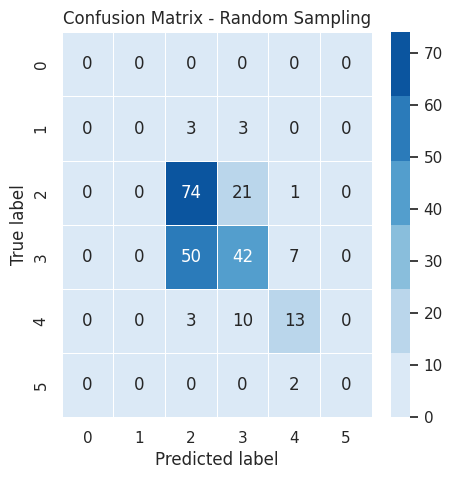

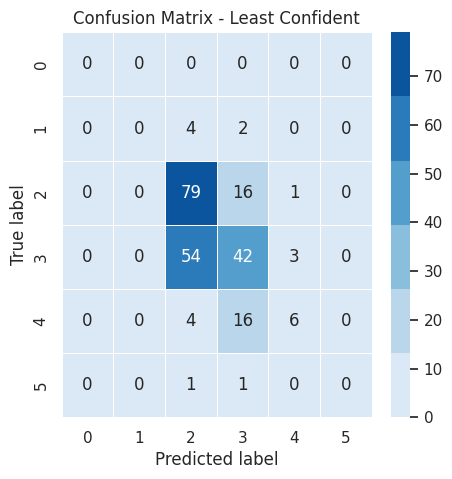

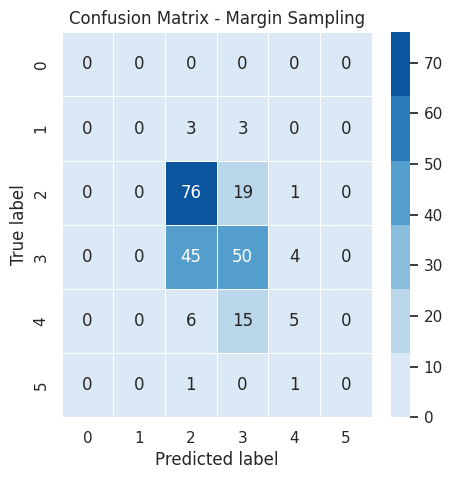

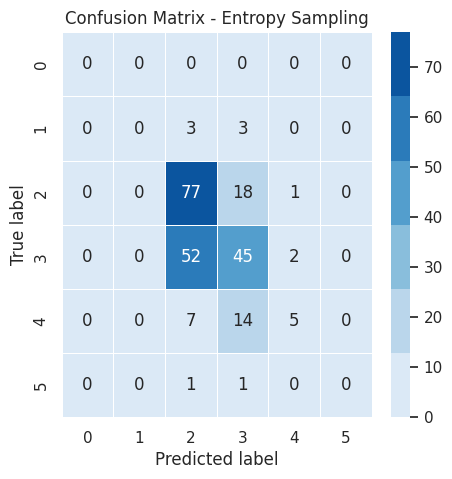



Round 3:
-----------------


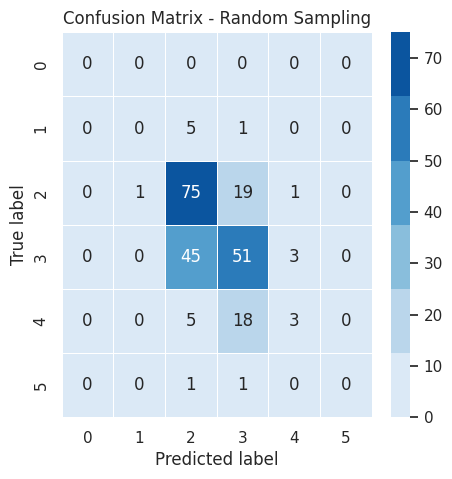

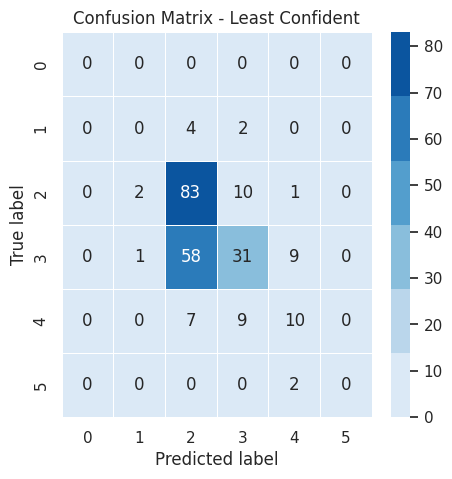

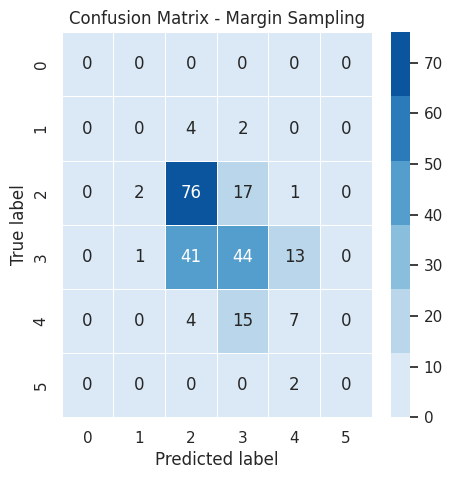

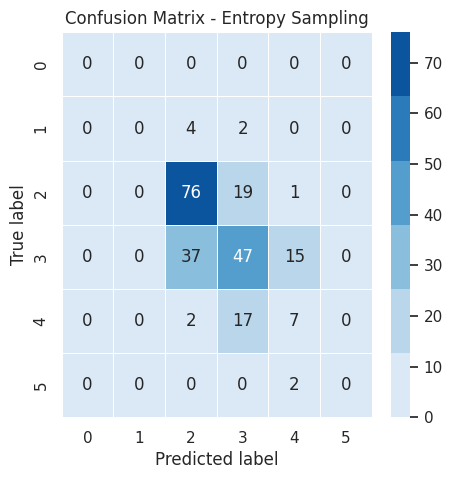



Round 4:
-----------------


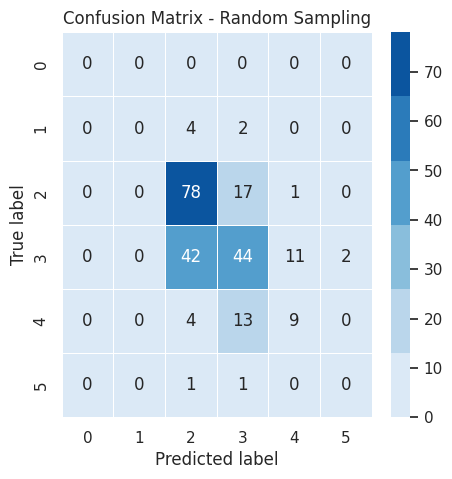

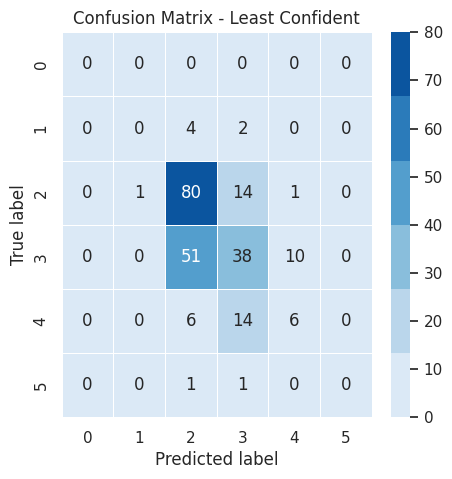

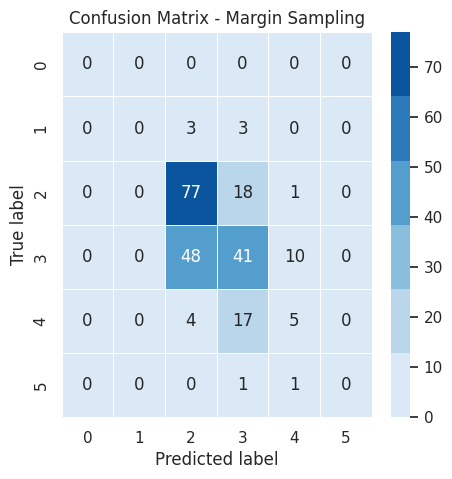

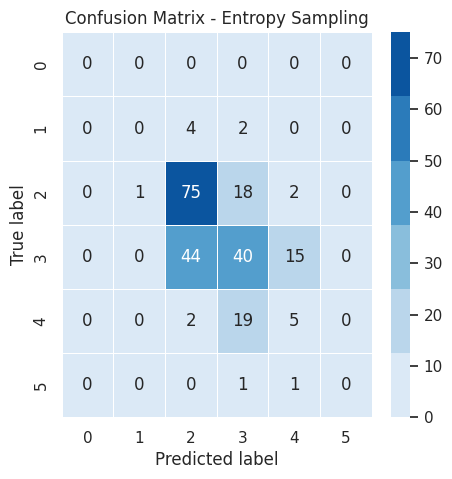



Round 5:
-----------------


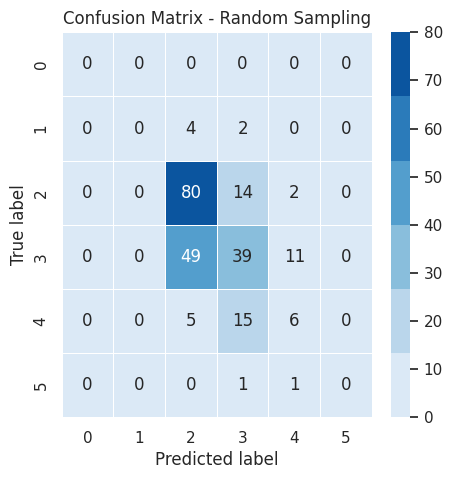

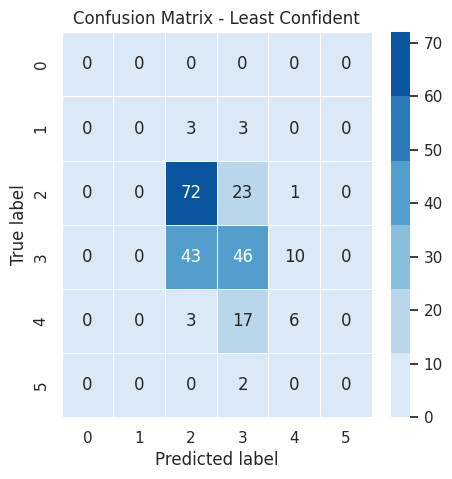

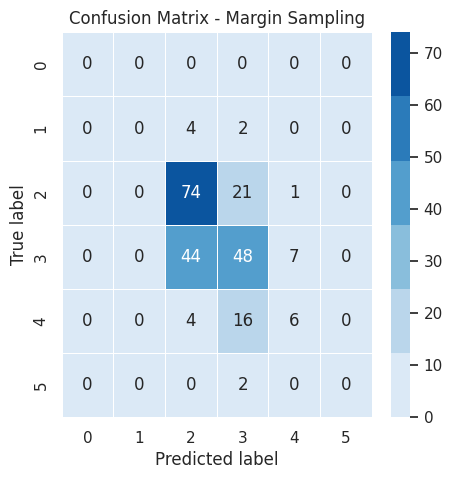

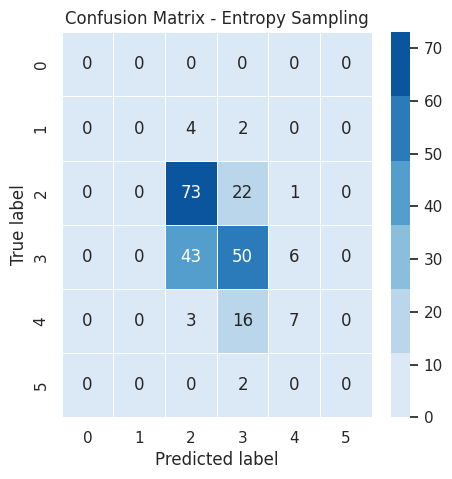



Round 6:
-----------------


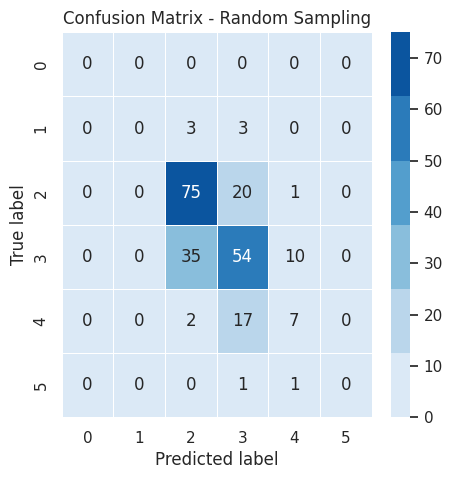

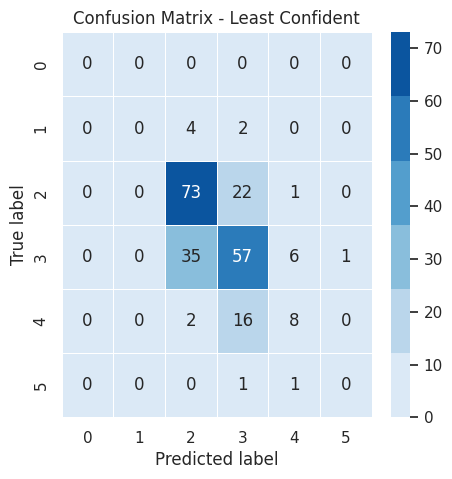

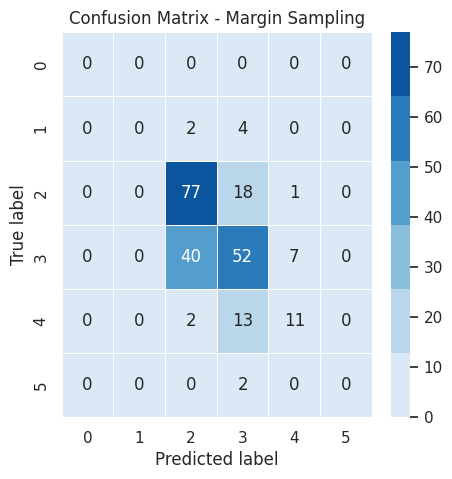

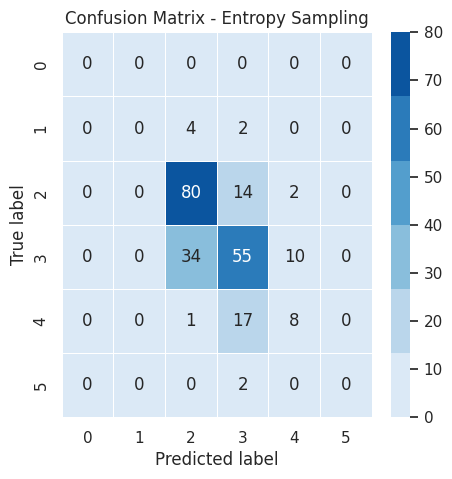



Round 7:
-----------------


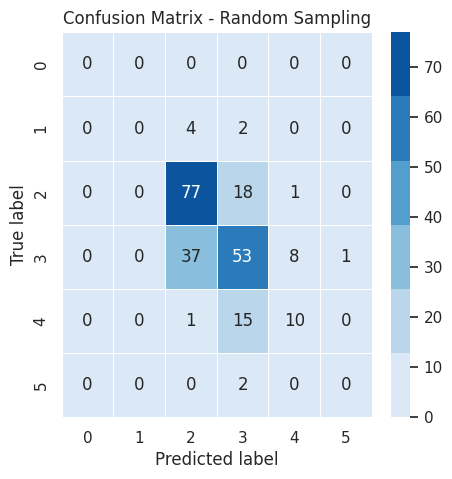

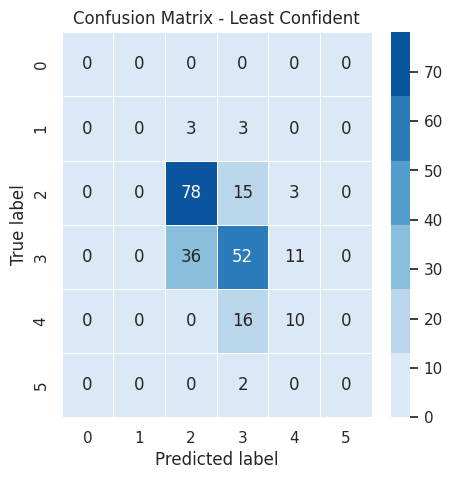

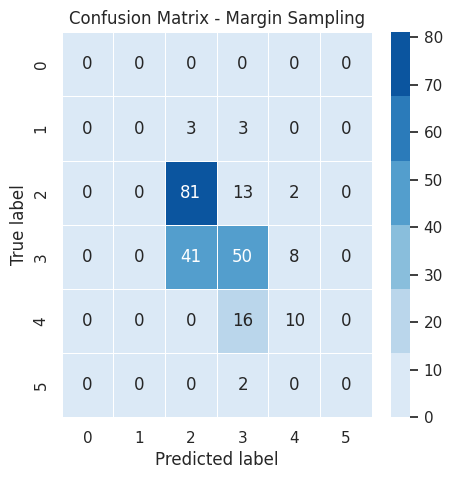

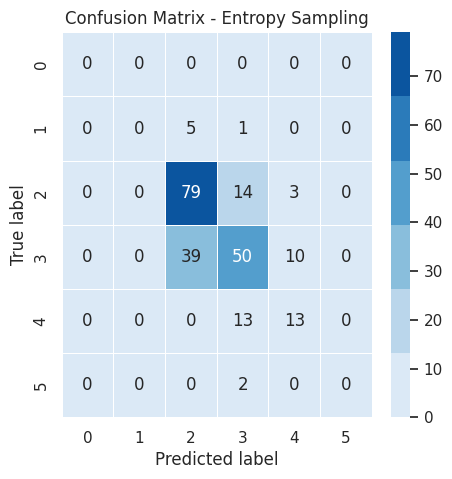



Round 8:
-----------------


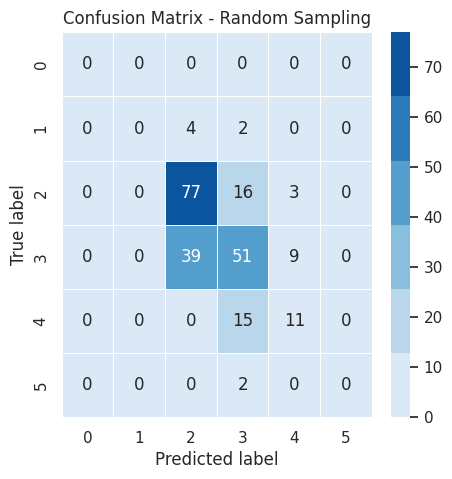

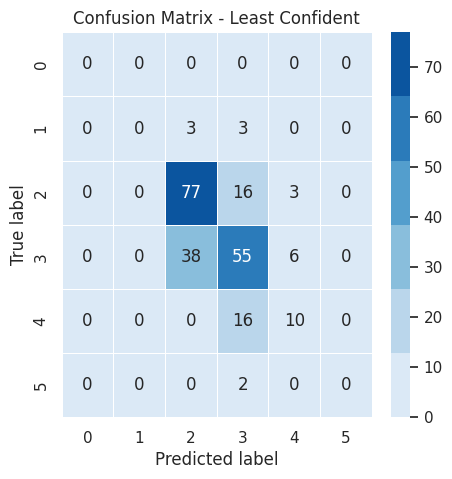

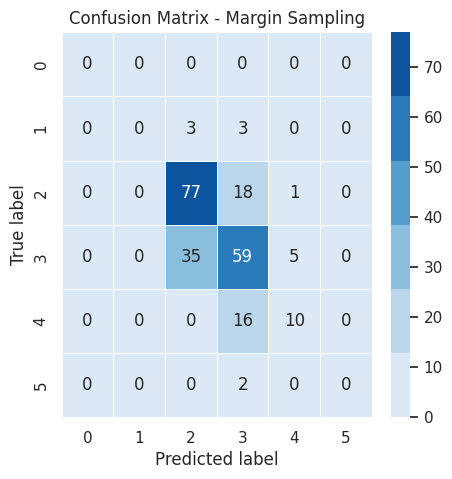

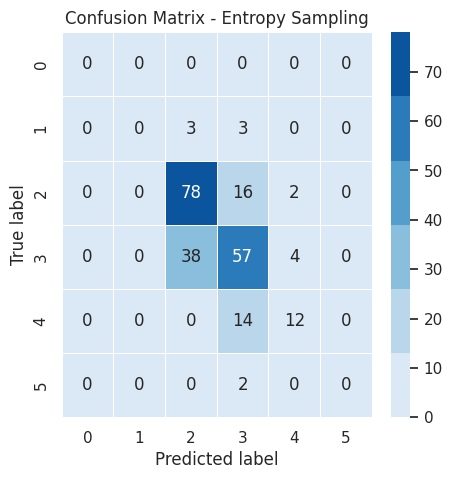



Round 9:
-----------------


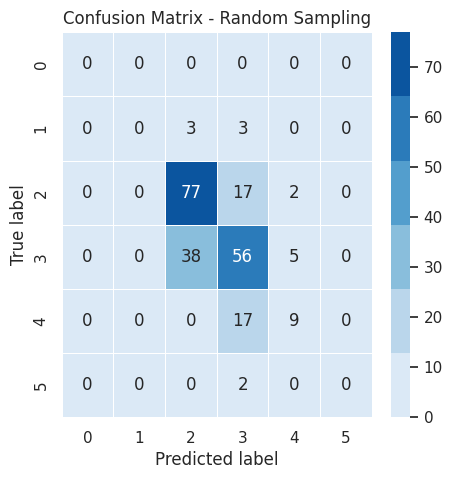

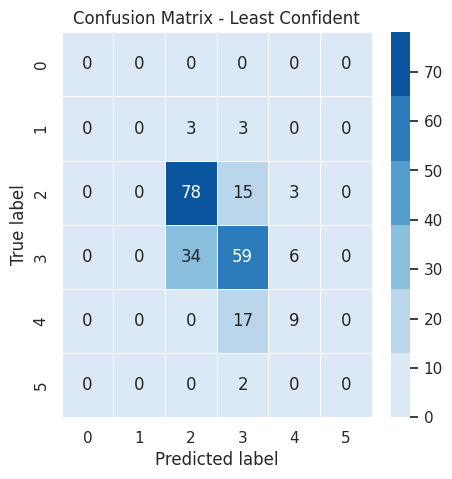

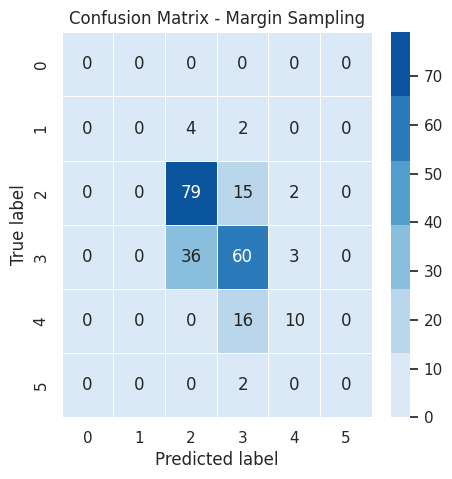

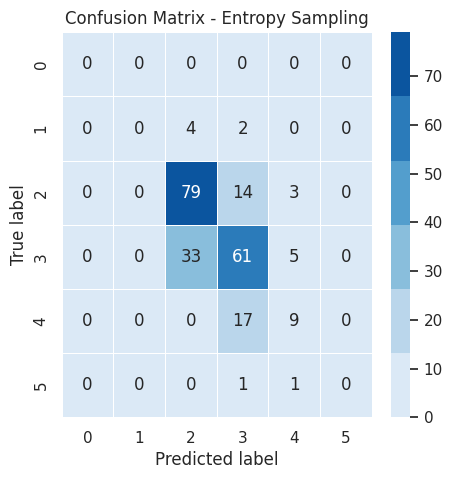



Round 10:
-----------------


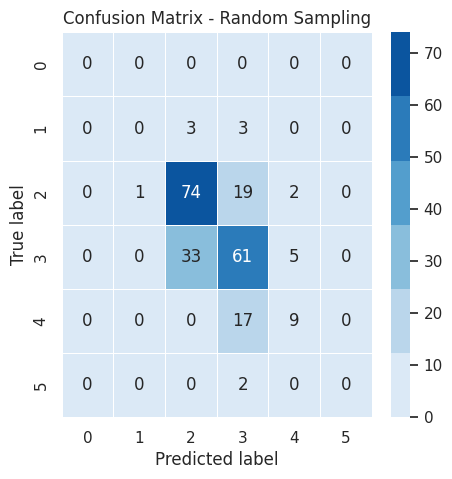

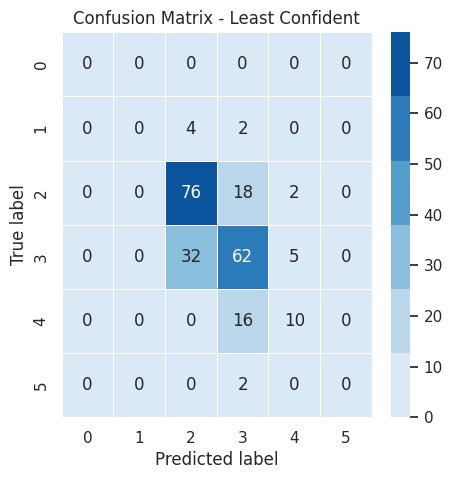

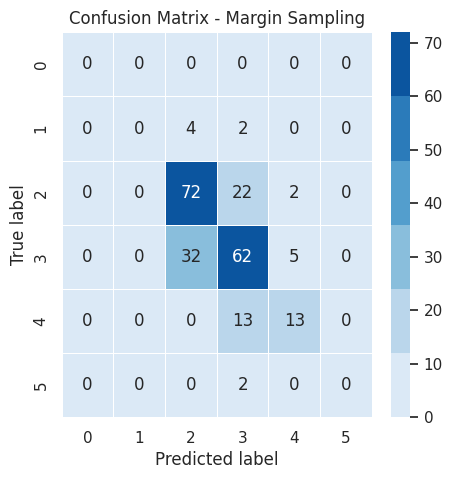

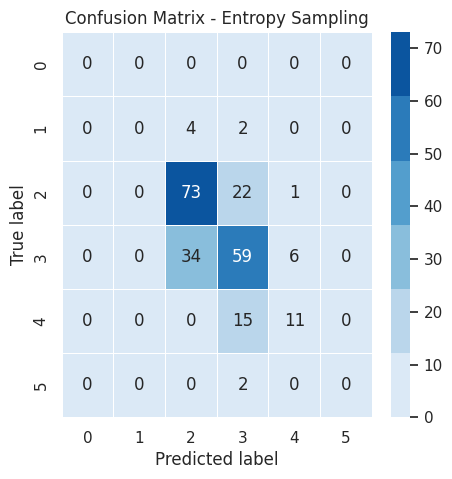

In [41]:
for round in range(num_rounds):
    print(f"\nRound {round + 1}:")
    print("-----------------")

    for strategy in results[name].keys():
        if strategy == 'Random Sampling':
            query_idx = random.query(X=X_train, y=y_unlabeled, batch_size=batch)

        elif strategy == 'Least Confident':
            query_idx = least.query(X=X_train, y=y_unlabeled, clf=clf, batch_size=batch)

        elif strategy == 'Margin Sampling':
            query_idx = margin.query(X=X_train, y=y_unlabeled, clf=clf, batch_size=batch)

        elif strategy == 'Entropy Sampling':
            query_idx = entropy.query(X=X_train, y=y_unlabeled, clf=clf, batch_size=batch)

        y_unlabeled[query_idx] = y_train[query_idx]
        clf.fit(X_train,y_unlabeled)

        #plot confusion matrix
        cm = confusion_matrix(y_test, clf.predict(X_test),labels=list(np.arange(0,6)))
        fig, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(cm, annot=True,ax=ax,fmt="d",linewidths=.5,cmap=sns.color_palette("Blues"));
        plt.title(f'Confusion Matrix - {strategy}')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
        print()
        print("===================================================================================")
